## Pseudo Random Number Generator

Let us learn about how to generate a random number.

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math
import random

#### 1) Linear Congruent
The most classic and simple PRNG is the Linear Congruential Generator (LCG). An LCG generates the next number in the sequence ($X_{n+1}$) using the previous number ($X_n$) with this linear equation:

$$X_{n+1} = (a \cdot X_n + c) \pmod m$$

- $X_0$ is the Seed
- $a$ is the Multiplier
- $c$ is the Increment
- $m$ is the Modulus
- $X_{n+1}$ is the next "random" integer.

In [3]:
class SimpleLCG:
    """
    A simple LCG implementation to show the math.
    NOTE: These parameters are BAD and just for demonstration.
    """
    def __init__(self, seed, a, c, m):
        self.state = seed  # X_n (starts at X_0)
        self.a = a
        self.c = c
        self.m = m

    def next_int(self):
        """Generate X_{n+1}"""
        # X_{n+1} = (a * X_n + c) % m
        self.state = (self.a * self.state + self.c) % self.m
        return self.state
    
    def next_float(self):
        """Generate a random float in [0.0, 1.0)"""
        # Generate the next integer, then divide by m
        return self.next_int() / self.m

# Let's use "bad" parameters (very short period)
# m=10, a=3, c=1, seed=0
lcg_bad = SimpleLCG(seed=0, a=3, c=1, m=10)

print("Bad LCG (short period):")
for _ in range(15):
    # Result: 1, 4, 3, 0, 1, 4, 3, 0, ... (repeats every 4 numbers!)
    print(lcg_bad.next_int(), end=', ')
print("\n")

Bad LCG (short period):
1, 4, 3, 0, 1, 4, 3, 0, 1, 4, 3, 0, 1, 4, 3, 



In [3]:

# Let's use better parameters (from glibc)
# m = 2**31 - 1 (or 2147483647)
# a = 1103515245
# c = 12345
lcg_good = SimpleLCG(seed=42, a=1103515245, c=12345, m=2147483647)

print("Good LCG (long period):")
for _ in range(10):
    # Results look random and don't repeat quickly
    print(lcg_good.next_int(), end=', ')
print("\n")

Good LCG (long period):
1250496048, 1310387594, 1622543901, 519131292, 937264594, 926495101, 276623842, 371918760, 737924297, 673123932, 



In [5]:
print("Good LCG (float [0, 1)):")
lcg_good_float = SimpleLCG(seed=42, a=1103515245, c=12345, m=2147483647)
for _ in range(5):
    print(f"{lcg_good_float.next_float():.5f}", end=', ') # e.g. 0.00219, 0.70893, ...
print()

Good LCG (float [0, 1)):
0.58231, 0.61020, 0.75556, 0.24174, 0.43645, 


#### 2) Some available random number from numpy/python

`np.random.random()` 
- Returns a float in the range [0.0, 1.0) (inclusive of 0.0, exclusive of 1.0).
- Uniform Distribution (every value has an equal chance).

`np.random.randint(a,b)` 
- Returns an integer $N$ such that $a \le N \le b$ (inclusive of both $a$ and $b$).
- Uniform Distribution.

`np.random.randn()` 
- Return float from normal distribution with Mean $\mu = 0$ and a Standard Deviation $\sigma = 1$.

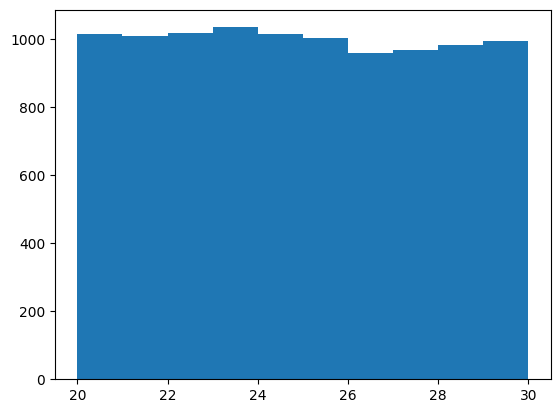

In [ ]:
xs = [np.random.randint(20,30) for _ in range(10000)]
plt.hist(xs, bins=range(20,31), align='left', rwidth=0.8)
plt.show()

#### 3) Manipulating random number to get desired behavior.
- Random a float from 0 to 5.
- Random a float from -1 to 1.
- Random a float form normal distribution with mean 5 and std dev 1.
- Random a float form normal distribution with mean 20 and std dev 10.

#### 4) Gacha Games!

The "Gacha Game" problem is a perfect example of "Discrete Probability" sampling. You are designing a gacha game with 3 rarities:

- R (Rare): 80%

- SR (Super Rare): 15%

- SSR (Super Super Rare): 5%

Algorithm : We use random.random(), which gives $U$ in $[0.0, 1.0)$, and "partition" this interval according to our probabilities.

## Monte Carlo Simulations

### Loaded Die.

<table>
<tr style="text-align:center">
    <td>Number</td>
    <td>1</td>
    <td>2</td>
    <td>3</td>
    <td>4</td>
    <td>5</td>
    <td>6</td>
</tr>
<tr style="text-align:center">
    <td>Probability</td>
    <td>0.3</td>
    <td>0.2</td>
    <td>0.1</td>
    <td>0.2</td>
    <td>0.1</td>
    <td>0.1</td>
</tr>
</table>

#### 1) Simulating the dice.

Simulate the dice result such that it has the given probability distribution.

#### 2) Expected Value.

What is the expected value of dice result? Try both simulation and analytical formula.

3) What is the expected value of $A+B$ where $A$ is the result of the first dice and $B$ is the result of the second dice? Use simulation and compare with analytic answer.

4) What is the expected value of $AB$?

5) Expected number of toss to see the first '6'

6) Now we play the games of two people. We take the product of the two dice. Whoever get more number wins. What is the probability of getting a draw.

7) A little bit harder: consider the game of product dice. If our first dice is 3, what is the probability of winning?

### Geometric Brownian Motion.

One popular way to simulate stock is using geometric brownian motion. Stockprice at $t+dt$ is related to the stock price at time $t$ by

$$s(t+dt) = s(t) + s(t)(\mu dt + \epsilon\sigma \sqrt{dt}) $$

where
1. $\mu$ is the mean rate of return. Typically quote as $\%$ per year.
2. $\epsilon$ is a normally distributed random variable with mean 0 and variance of 1.
3. $\sigma$ is called volatility. It typically quoted as $\%$ per $\sqrt{\text{year}}$. It represent how wildly stock can go.

To use this formula, we need to make sure the unit for $t$ is correct. Normally just convert it to year

All these number can be looked up from the internet (you can calculate one yourself from historical data too). 

Here is one example: google for aapl volatility.

The funny unit of $\sqrt{t}$ has to do with scaling behavior. You can read it in the lecture notes.

1) Given the volatility($\sigma$) of $28\%$ per $\sqrt{\text{year}}$ and mean rate of return $8.77\%$. The stock today is 119.21$. Write a function to generate the price for tomorrow given the price today.

2) Generate the price for 1 trading year(all the time we said year it actually means trading year). Have dt = 1 day. 1 Trading year is actually 252 day.

3) What is the expected value of the stock at the end of year?

4) What is the variance of the stock at the end of the year?

5) What is the probability that the price of the stock will dip below 70 at anytime of the year?

6) What is the proabability that th stock will dip below 100 and come back to 110 within a year? 

7) If we buy the stock today at 119.21 dollar and our stragy is that we would sell if the stock fall more than 5 dollar or go up more than 10 dollar.

- 7.1) What is the probability that we get to sell it?

- 7.2) If we get to sell it what's the probability of making profit.